# Transforming Numerical Variables

Linear and Logistic Regression assume that the variables are normally distributed. If they are not, we can often apply a mathematical transformation to change their distribution into Gaussian.

Commonly used mathematical transformations include:
- Logarithm
- Reciprocal
- Power
- Square and cube root
- Box-Cox
- Yeo-Johnson

## Transforming variables with the logarithm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

In [4]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data

/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


To evaluate the linearity, wi'll plot the histogram and the Q-Q plot:

In [5]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

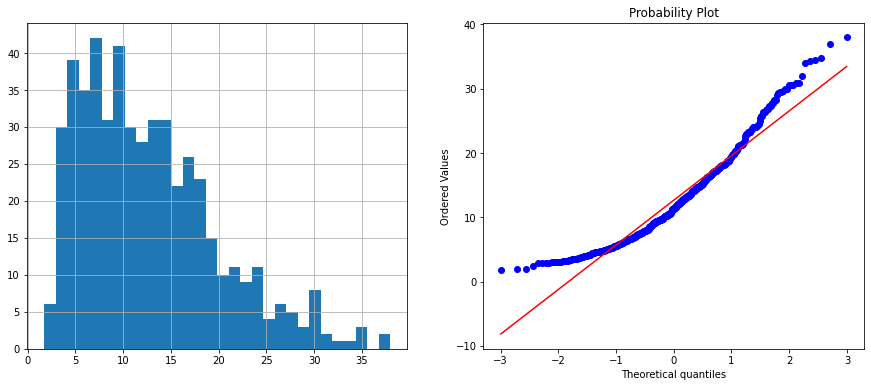

In [6]:
diagnostic_plots(data, 'LSTAT')

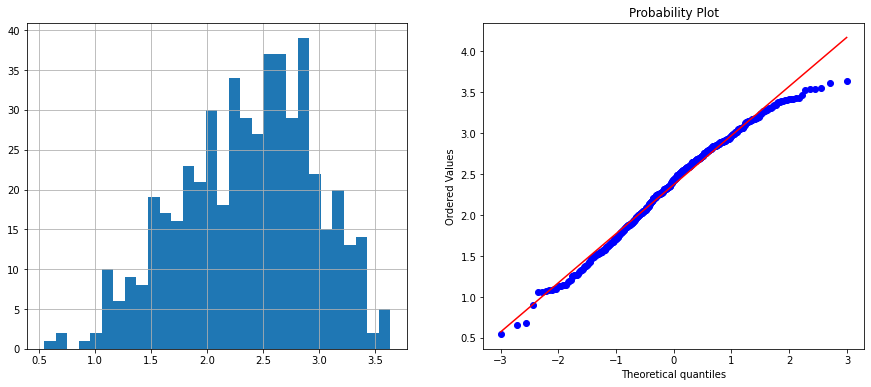

In [9]:
data_tf = data.copy()
vars_to_transform = ["LSTAT", "NOX", "DIS", "RM"]
data_tf[vars_to_transform] = np.log(data[vars_to_transform])

# checking the before and after
diagnostic_plots(data_tf, 'LSTAT')

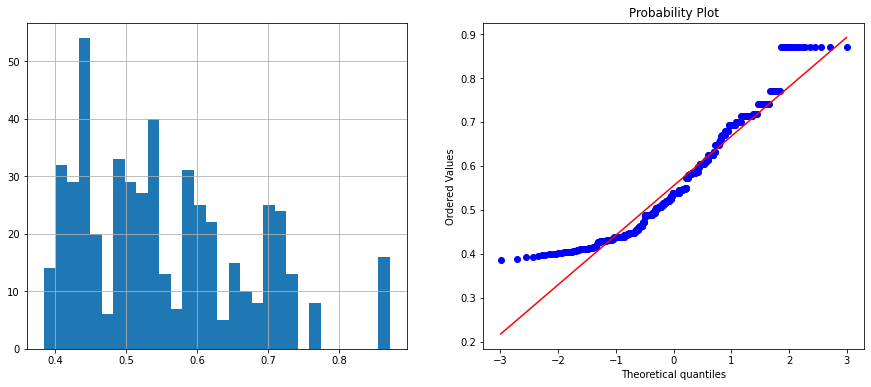

In [10]:
# checking the NOX variable
diagnostic_plots(data, "NOX")

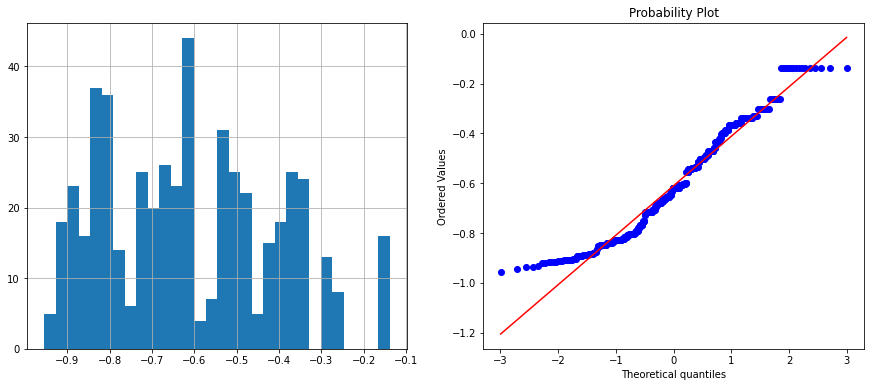

In [11]:
diagnostic_plots(data_tf, "NOX")


not very helpful ...

In [12]:
# using numpy transformers
transformer = FunctionTransformer(np.log)
data_tf = transformer.transform(data[vars_to_transform])
data_tf

,LSTAT,NOX,DIS,RM
0,1.605430,-0.619897,1.408545,1.883275
1,2.212660,-0.757153,1.602836,1.859574
2,1.393766,-0.757153,1.602836,1.971996
3,1.078410,-0.780886,1.802073,1.945624
4,1.673351,-0.780886,1.802073,1.966693
...,...,...,...,...
501,2.269028,-0.556870,0.907694,1.886008
502,2.206074,-0.556870,0.827460,1.811562
503,1.729884,-0.556870,0.773574,1.942476
504,1.868721,-0.556870,0.870833,1.916040


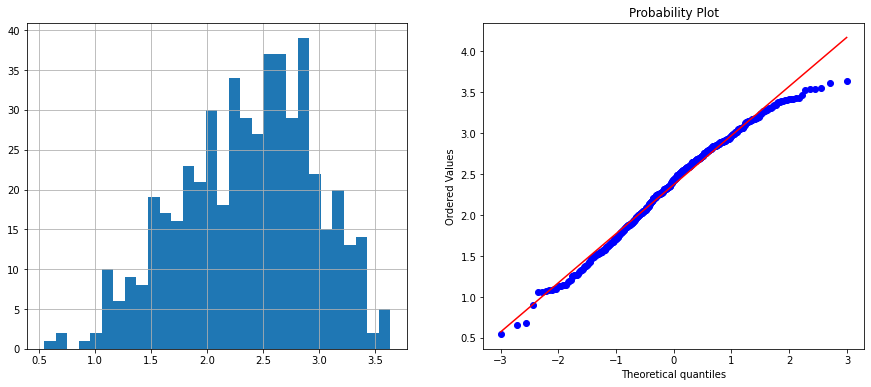

In [13]:
# checking the transformation with sckit-learn
diagnostic_plots(data_tf, "LSTAT")

In [14]:
# using feature_engine
lt = LogTransformer(variables=vars_to_transform)
lt.fit(data)

# LogTransformer will transform every numerical variables if variables=None
data_tf = lt.transform(data)
data_tf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,-0.619897,1.883275,65.2,1.408545,1.0,296.0,15.3,396.90,1.605430
1,0.02731,0.0,7.07,0.0,-0.757153,1.859574,78.9,1.602836,2.0,242.0,17.8,396.90,2.212660
2,0.02729,0.0,7.07,0.0,-0.757153,1.971996,61.1,1.602836,2.0,242.0,17.8,392.83,1.393766
3,0.03237,0.0,2.18,0.0,-0.780886,1.945624,45.8,1.802073,3.0,222.0,18.7,394.63,1.078410
4,0.06905,0.0,2.18,0.0,-0.780886,1.966693,54.2,1.802073,3.0,222.0,18.7,396.90,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,-0.556870,1.886008,69.1,0.907694,1.0,273.0,21.0,391.99,2.269028
502,0.04527,0.0,11.93,0.0,-0.556870,1.811562,76.7,0.827460,1.0,273.0,21.0,396.90,2.206074
503,0.06076,0.0,11.93,0.0,-0.556870,1.942476,91.0,0.773574,1.0,273.0,21.0,396.90,1.729884
504,0.10959,0.0,11.93,0.0,-0.556870,1.916040,89.3,0.870833,1.0,273.0,21.0,393.45,1.868721


## Transforming variables with the reciprocal function

The reciprocal in math is just the 1/**real_value**. This transformation have a very drastic effect on the variable distribution. It **isn't defined for the value 0**, but it can be applied to negative numbers.

In [15]:
from feature_engine.transformation import ReciprocalTransformer

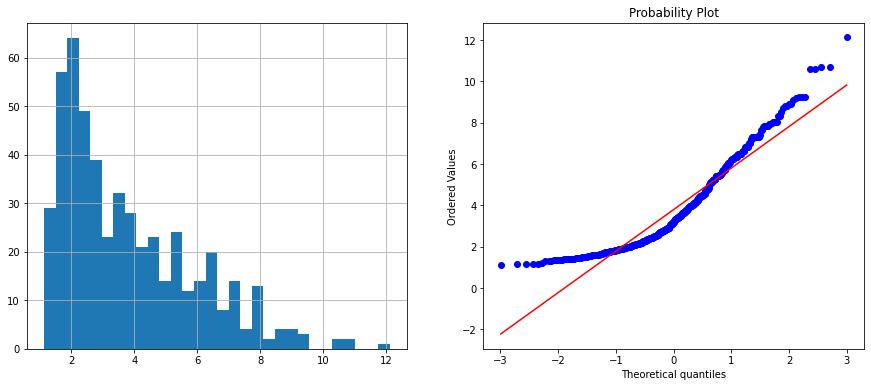

In [16]:
diagnostic_plots(data, 'DIS')

In [17]:
data_tf = data.copy()
data_tf[vars_to_transform] = np.reciprocal(data[vars_to_transform])
data_tf[vars_to_transform]

,LSTAT,NOX,DIS,RM
0,0.200803,1.858736,0.244499,0.152091
1,0.109409,2.132196,0.201325,0.155739
2,0.248139,2.132196,0.201325,0.139179
3,0.340136,2.183406,0.164957,0.142898
4,0.187617,2.183406,0.164957,0.139919
...,...,...,...,...
501,0.103413,1.745201,0.403454,0.151676
502,0.110132,1.745201,0.437158,0.163399
503,0.177305,1.745201,0.461361,0.143349
504,0.154321,1.745201,0.418603,0.147189


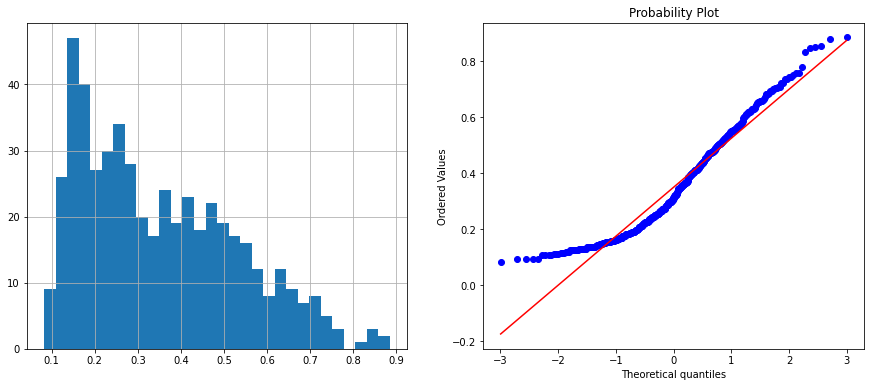

In [18]:
diagnostic_plots(data_tf, 'DIS')

In [19]:
# using scikit-learn
transformer = FunctionTransformer(np.reciprocal)
data_tf = transformer.transform(data[vars_to_transform])
data_tf

,LSTAT,NOX,DIS,RM
0,0.200803,1.858736,0.244499,0.152091
1,0.109409,2.132196,0.201325,0.155739
2,0.248139,2.132196,0.201325,0.139179
3,0.340136,2.183406,0.164957,0.142898
4,0.187617,2.183406,0.164957,0.139919
...,...,...,...,...
501,0.103413,1.745201,0.403454,0.151676
502,0.110132,1.745201,0.437158,0.163399
503,0.177305,1.745201,0.461361,0.143349
504,0.154321,1.745201,0.418603,0.147189


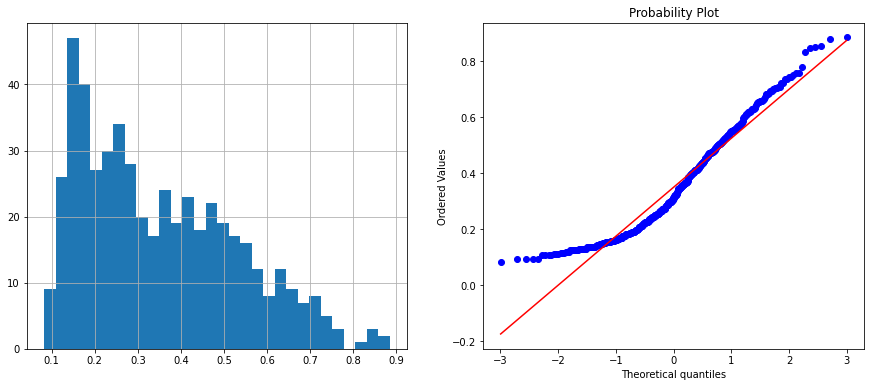

In [20]:
# using feature engine
tf_transform = ReciprocalTransformer(variables=vars_to_transform)
tf_transform.fit(data)
data_tf = tf_transform.transform(data)

diagnostic_plots(data_tf, 'DIS')

## Using square and cube root to transform variables

The square and cube root transformations are two specific forms of power transformations where the exponents are 1/2 and 1/3.

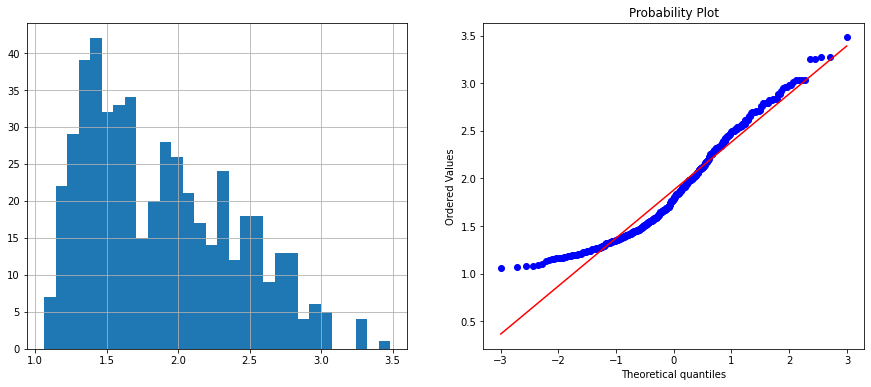

In [21]:
data_tf = data.copy()
data_tf[vars_to_transform] = np.sqrt(data[vars_to_transform])
diagnostic_plots(data_tf, "DIS")

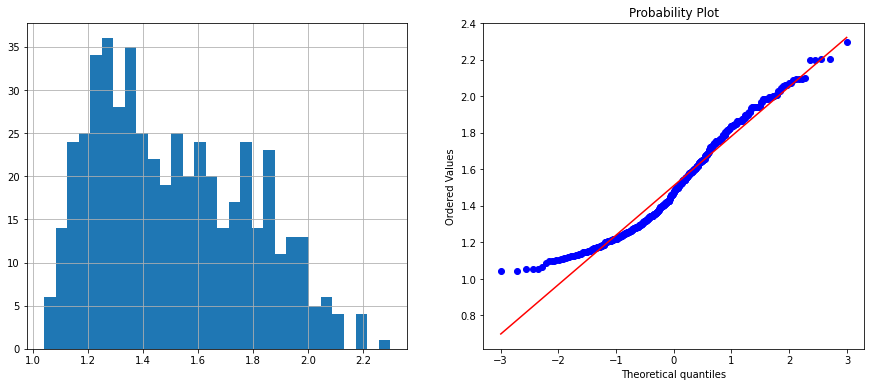

In [22]:
data_tf = data.copy()
data_tf[vars_to_transform] = np.cbrt(data[vars_to_transform])
diagnostic_plots(data_tf, "DIS")

In [23]:
# using scikit
transformer = FunctionTransformer(np.sqrt)
data_tf = transformer.transform(data[vars_to_transform])
data_tf

,LSTAT,NOX,DIS,RM
0,2.231591,0.733485,2.022375,2.564176
1,3.023243,0.684836,2.228699,2.533969
2,2.007486,0.684836,2.228699,2.680485
3,1.714643,0.676757,2.462154,2.645373
4,2.308679,0.676757,2.462154,2.673387
...,...,...,...,...
501,3.109662,0.756968,1.574357,2.567684
502,3.013304,0.756968,1.512448,2.473863
503,2.374868,0.756968,1.472243,2.641212
504,2.545584,0.756968,1.545607,2.606530


## Generalizing square and cube transformers with Power Transformations

Are mathematical transformations that follow $X_{t} = X^{\lambda}$, where lambda can be any exponent.

In [24]:
from feature_engine.transformation import PowerTransformer

In [27]:
# with numpy we have np.power to use, and to pass to FunctionTransform(np.power) ...
# so, lets do it just with the feature_engine
power_transformer = PowerTransformer(variables=vars_to_transform, exp=0.3)  # aprox to 1/3 power
power_transformer.fit(data)
data_tf = power_transformer.transform(data)
data_tf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.830299,1.759417,65.2,1.525868,1.0,296.0,15.3,396.90,1.618709
1,0.02731,0.0,7.07,0.0,0.796805,1.746951,78.9,1.617450,2.0,242.0,17.8,396.90,1.942155
2,0.02729,0.0,7.07,0.0,0.796805,1.806875,61.1,1.617450,2.0,242.0,17.8,392.83,1.519118
3,0.03237,0.0,2.18,0.0,0.791151,1.792636,45.8,1.717074,3.0,222.0,18.7,394.63,1.381988
4,0.06905,0.0,2.18,0.0,0.791151,1.804002,54.2,1.717074,3.0,222.0,18.7,396.90,1.652031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.846148,1.760860,69.1,1.312992,1.0,273.0,21.0,391.99,1.975277
502,0.04527,0.0,11.93,0.0,0.846148,1.721969,76.7,1.281765,1.0,273.0,21.0,396.90,1.938321
503,0.06076,0.0,11.93,0.0,0.846148,1.790944,91.0,1.261211,1.0,273.0,21.0,396.90,1.680288
504,0.10959,0.0,11.93,0.0,0.846148,1.776796,89.3,1.298552,1.0,273.0,21.0,393.45,1.751752


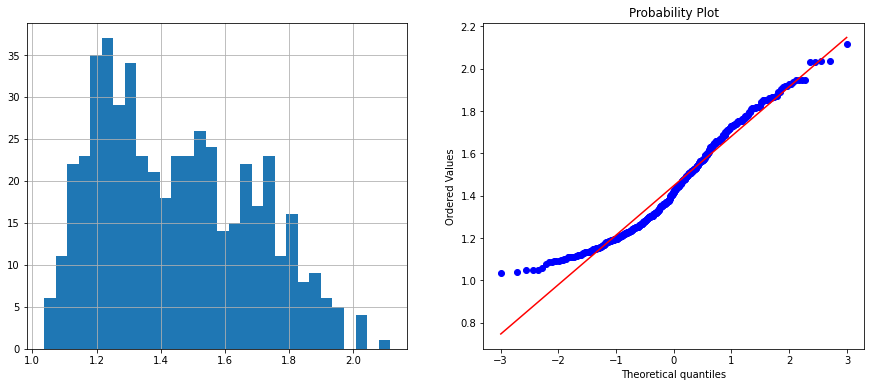

In [28]:
diagnostic_plots(data_tf, "DIS")

We can use ScikitLearn Pipe to pipe different transformations steps into just one sequence.

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline(
    [
    ('power1', PowerTransformer(variables = ['LSTAT', 'NOX'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['DIS'], exp=0.4)),
    ('power3', PowerTransformer(variables = ['RM'], exp=0.5)),
     ]
)

In [32]:
# we have just the specifications
pipe 

Pipeline(steps=[('power1',
                 PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX'])),
                ('power2', PowerTransformer(exp=0.4, variables=['DIS'])),
                ('power3', PowerTransformer(variables=['RM']))])

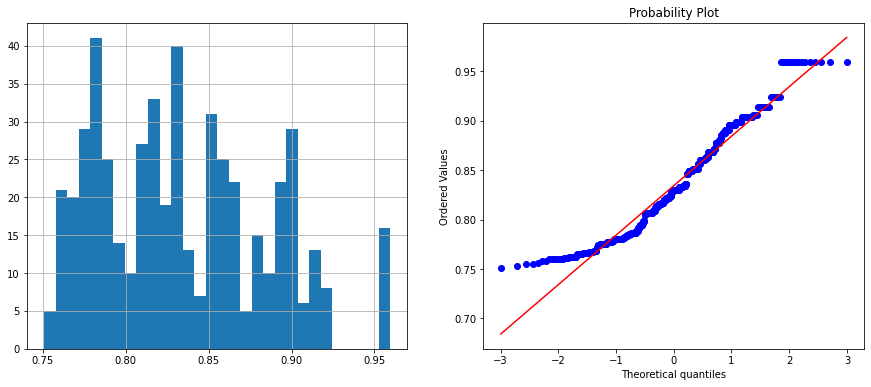

In [33]:
# training the transformations
pipe.fit(data)
data_tf = pipe.transform(data)
diagnostic_plots(data_tf, "NOX")

In [35]:
pipe.get_params()

{'memory': None,
 'steps': [('power1', PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX'])),
  ('power2', PowerTransformer(exp=0.4, variables=['DIS'])),
  ('power3', PowerTransformer(variables=['RM']))],
 'verbose': False,
 'power1': PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX']),
 'power2': PowerTransformer(exp=0.4, variables=['DIS']),
 'power3': PowerTransformer(variables=['RM']),
 'power1__exp': 0.3,
 'power1__variables': ['LSTAT', 'NOX'],
 'power2__exp': 0.4,
 'power2__variables': ['DIS'],
 'power3__exp': 0.5,
 'power3__variables': ['RM']}

## Performing Box-Cox transformation

The Box-Cox transformation belongs to the power family of functions and is defined by $\frac{X^{\lambda} - 1}{\lambda}$ if X > 0 or log(X) if X = 0.

Lambda is the transformation parameter, that will be choose by the library and returned to you. Remember to fit this transformation on your training data, and use those params on testing data to avoid data leakage.

>Box-Cox transformation handle just positive values, for negative values use Yeo-Johnson

In [36]:
from feature_engine.transformation import BoxCoxTransformer

In [37]:
data_tf = data.copy()
# using scipy stats
data_tf["LSTAT"], param = stats.boxcox(data["LSTAT"])
print(f"Optimal lambda: {param}")

Optimal lambda: 0.22776736893884023


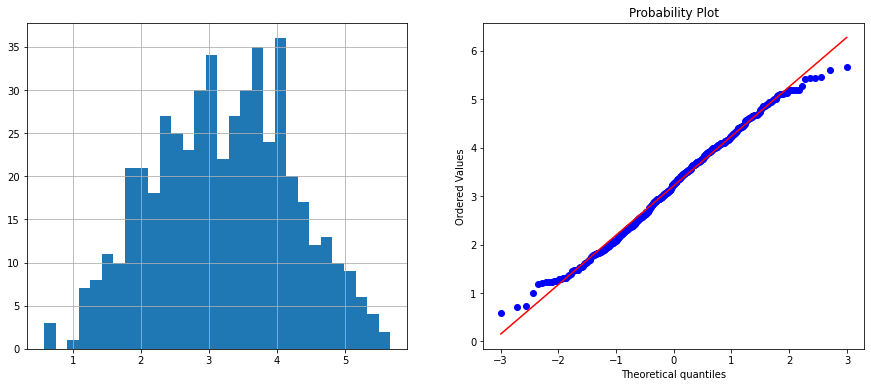

In [38]:
diagnostic_plots(data_tf, "LSTAT")

In [41]:
# using scikit
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method="box-cox", standardize=False)
transformer.fit(data[vars_to_transform])

data_tf = transformer.transform(data[vars_to_transform])

In [43]:
data_tf_df = pd.DataFrame(data_tf, columns=vars_to_transform)

In [44]:
data_tf_df

,LSTAT,NOX,DIS,RM
0,1.938257,-0.834416,1.264870,2.960568
1,2.876983,-1.092408,1.418585,2.905658
2,1.640387,-1.092408,1.418585,3.171386
3,1.222396,-1.140400,1.571460,3.107843
4,2.036925,-1.140400,1.571460,3.158548
...,...,...,...,...
501,2.970889,-0.726384,0.846506,2.966940
502,2.866089,-0.726384,0.776403,2.796197
503,2.120221,-0.726384,0.728829,3.100307
504,2.329393,-0.726384,0.814408,3.037448


In [45]:
transformer.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

In [46]:
# using Feature-Engine
bx_transform = BoxCoxTransformer(variables=vars_to_transform)
bx_transform.fit(data)

data_tf = bx_transform.transform(data)
data_tf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,-0.834416,2.960568,65.2,1.264870,1.0,296.0,15.3,396.90,1.938257
1,0.02731,0.0,7.07,0.0,-1.092408,2.905658,78.9,1.418585,2.0,242.0,17.8,396.90,2.876983
2,0.02729,0.0,7.07,0.0,-1.092408,3.171386,61.1,1.418585,2.0,242.0,17.8,392.83,1.640387
3,0.03237,0.0,2.18,0.0,-1.140400,3.107843,45.8,1.571460,3.0,222.0,18.7,394.63,1.222396
4,0.06905,0.0,2.18,0.0,-1.140400,3.158548,54.2,1.571460,3.0,222.0,18.7,396.90,2.036925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,-0.726384,2.966940,69.1,0.846506,1.0,273.0,21.0,391.99,2.970889
502,0.04527,0.0,11.93,0.0,-0.726384,2.796197,76.7,0.776403,1.0,273.0,21.0,396.90,2.866089
503,0.06076,0.0,11.93,0.0,-0.726384,3.100307,91.0,0.728829,1.0,273.0,21.0,396.90,2.120221
504,0.10959,0.0,11.93,0.0,-0.726384,3.037448,89.3,0.814408,1.0,273.0,21.0,393.45,2.329393


In [47]:
bx_transform.lambda_dict_

{'LSTAT': 0.22776736893884023,
 'NOX': -0.9156120907279849,
 'DIS': -0.15560583167193484,
 'RM': 0.4489597919730037}

Basically all methods (**scipy, scikit-learn, feature-engine**) have the same values for the lambda.

## Performing Yeo-Johnson transformation

This is an extension of Box-Cox transformation that supports negative values:

- $\frac{(X + 1)^{\lambda} - 1}{\lambda}$; if lambda is not 0 and X >= zero
- $ln(X+1)$; if lambda is zero and X>= zero
- $-\frac{(-X+1)^{2-\lambda}-1}{2-\lambda}$; if lambda is not 2 and X is negative
- $-ln(-X+1)$; if lambda is 2 and X is negative

In [48]:
from feature_engine.transformation import YeoJohnsonTransformer

With the following methods we can perform Yeo-Johnson transformations, very similar to the rest of the code we already coded.

- applied variable to variable `stats.yeojohnson()`
- `scikit_trasnformer = YeoJohnsonTransformer(variables=vars_to_transform)`
- `feature_engine_transformer = PowerTransformer(method="yeo-johnson", standardize=False)`